In [1]:
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.24/02


In [2]:
f = r.TFile("laserEvents_SLM_26000_00000 (1).root")
t = f.Get('LaserEvents/tree')

In [9]:
rdf = r.RDataFrame("LaserEvents/tree", 'laserEvents_SLM_26000_00000 (1).root')
df = pd.DataFrame(rdf.AsNumpy())
# redacting the data into a pandas dataframe

df.columns

Index(['gpsTimeStamp', 'cccTimeStamp', 'runNum', 'subRunNum', 'fillNum',
       'bunchNum', 'fillType', 'caloNum', 'xtalNum', 'sipmTime', 'sipmEnergy',
       'sipmPedestal', 'sipmChi2', 'smPin1Amp', 'smPin1Time', 'smPin2Amp',
       'smPin2Time', 'smPmtAmp', 'smPmtTime', 'lmPmtAmp1', 'lmPmtAmp2',
       'lmPmtArea1', 'lmPmtArea2', 'lmPmtTime1', 'lmPmtTime2', 'slmTime',
       'slmEnergy', 'slmPedestal', 'slmChi2'],
      dtype='object')

In [16]:
df.loc[df['caloNum']==17].loc[df['xtalNum']==1].loc[df['fillNum']==65][['fillNum','sipmTime', 'sipmEnergy', 'slmTime','slmEnergy']]


,fillNum,sipmTime,sipmEnergy,slmTime,slmEnergy
25036,65,-99395.511498,904.877479,0.000000,2380.795365
25090,65,-8077.993149,937.492382,91317.489075,2100.642116
25144,65,139926.094845,855.109564,239321.601097,2169.221711
25198,65,287921.982738,863.958742,387317.549110,2386.377017
25252,65,435917.985713,958.291378,535313.526733,2405.394189


ValueError: `ydata` must not be empty!

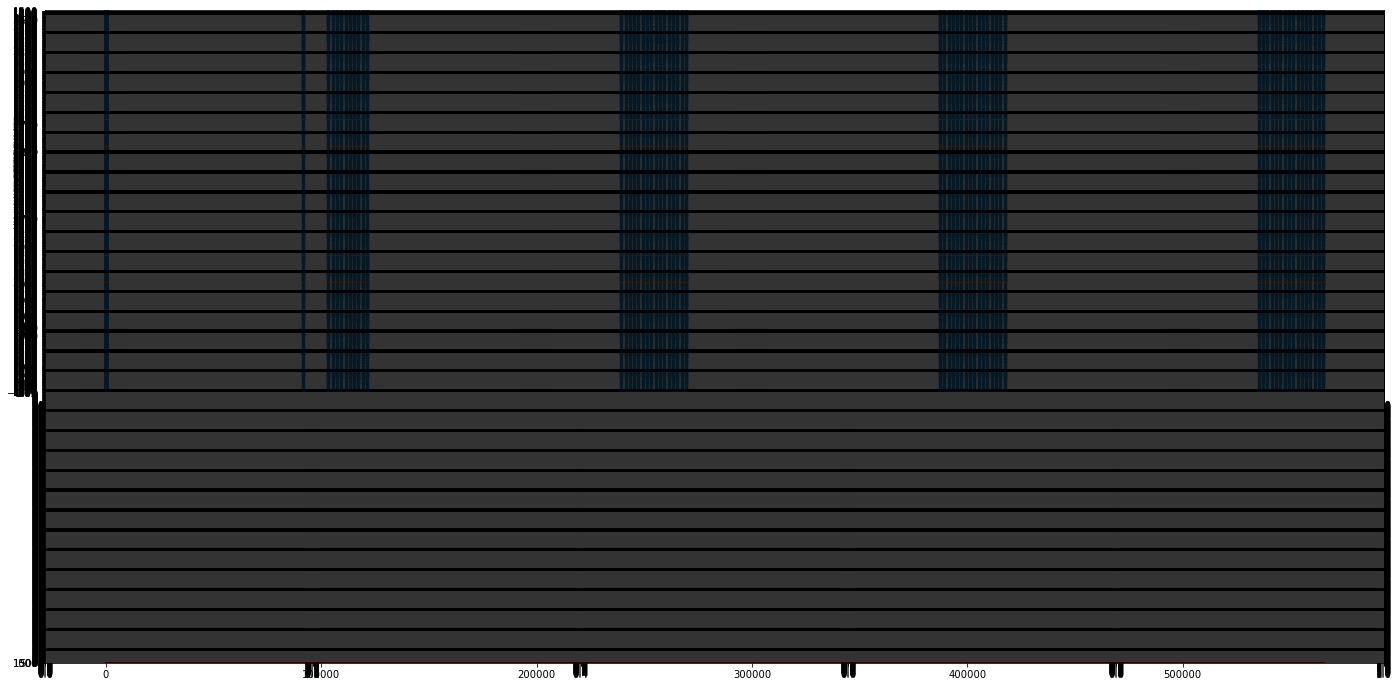

In [50]:
caloCount = max(df['caloNum'])
xtalCount = max(df['xtalNum'])

slopes = np.zeros((caloCount,xtalCount+1))
#matrix for stabilities of all energy ratios

fig,ax = plt.subplots(caloCount*xtalCount)

for calo in pd.unique(df['caloNum']):
    for xtal in pd.unique(df['xtalNum']):
        df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal]
        # group table by fillNum and only select those fills with multiple signals 
        # and find the Energy of sync signal ( with min slmTime)

        df_fills = df_xtal.groupby('fillNum').count().reset_index()
        syncFills = df_fills[df_fills['slmTime']>1]
        df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]
        result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum','slmEnergy']]
        # what do bunchNum signify? They seem to look unique
        
        df_normal = df_xtal.merge(result, on='fillNum', how='right')
        
        
        ax[xtal + (calo-1)*xtalCount].plot(df_normal['sipmTime'], df_normal['slmEnergy_y']*df_normal['sipmEnergy']/df_normal['slmEnergy_x'],".")
        ax[xtal + (calo-1)*xtalCount].set_title("")
        
        def func(x,m,b):
            return m*x + b 
        
        initial_guess = [1.2, 0.03]
        pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['slmEnergy_y']*df_normal['sipmEnergy']/df_normal['slmEnergy_x'], p0=initial_guess)
        xfit = np.linspace(np.amin(df_normal['slmTime']),np.amax(df_normal['slmTime']))
        yfit = func(xfit, pars[0], pars[1])
        plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")
        
        slopes[calo-1][xtal-1]=pars[0]



,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,sipmEnergy,...,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy_x,slmPedestal,slmChi2,fillNum,slmEnergy_y


/var/folders/bg/h849yg0s2771n7mypkp93k680000gn/T/ipykernel_31878/244371455.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(arr[calo], cmap=plt.cm.Blues)


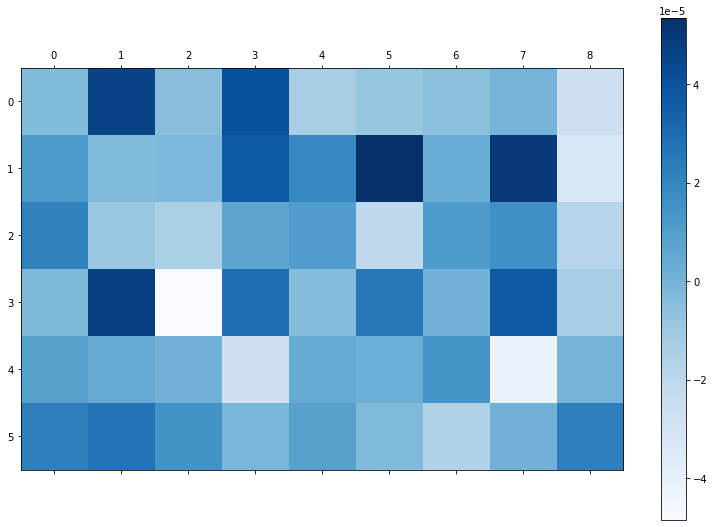

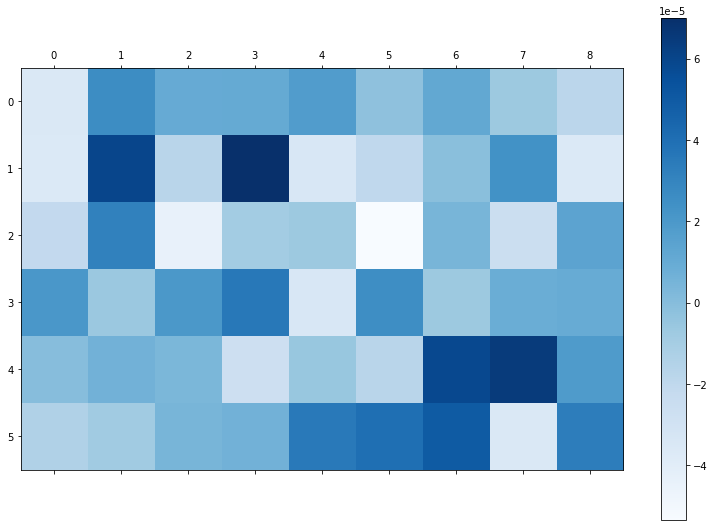

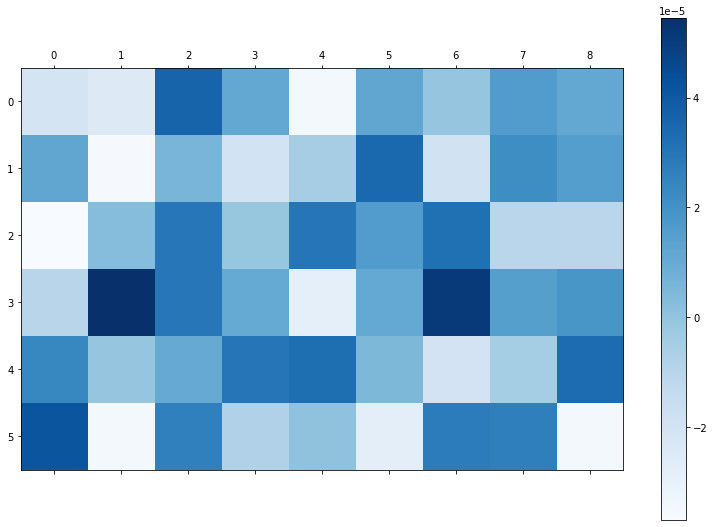

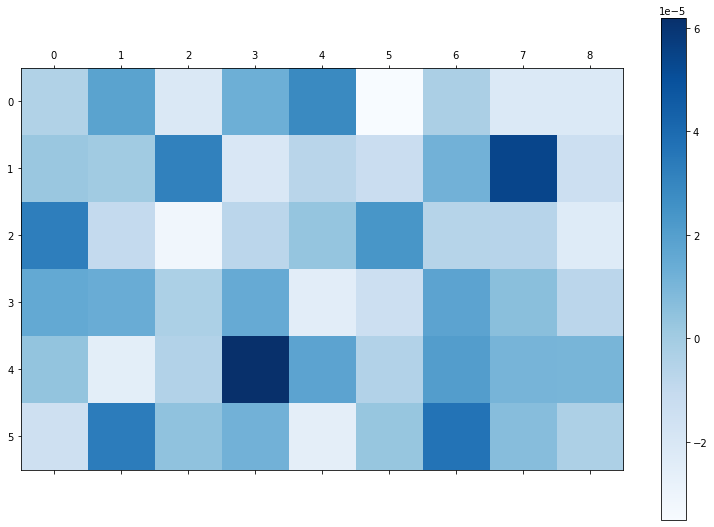

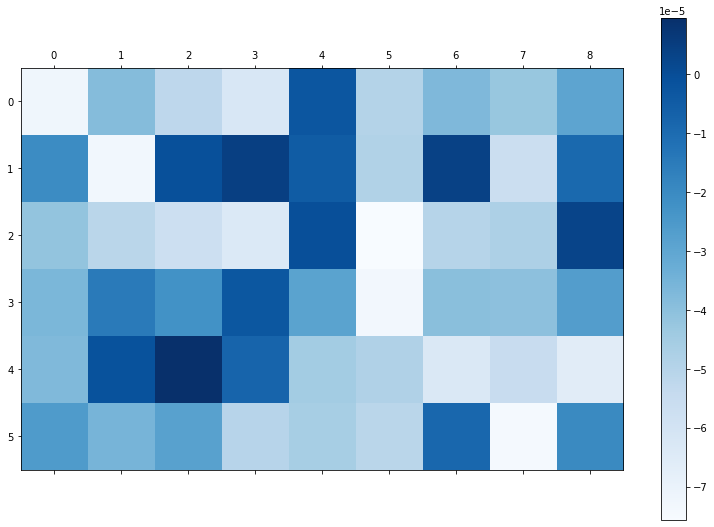

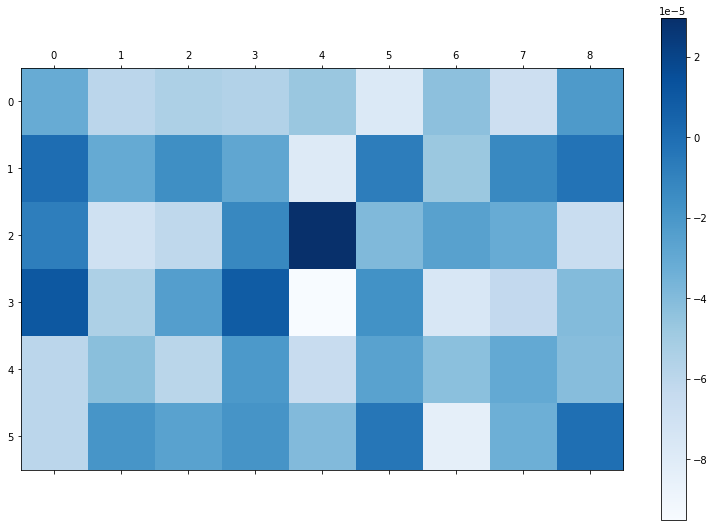

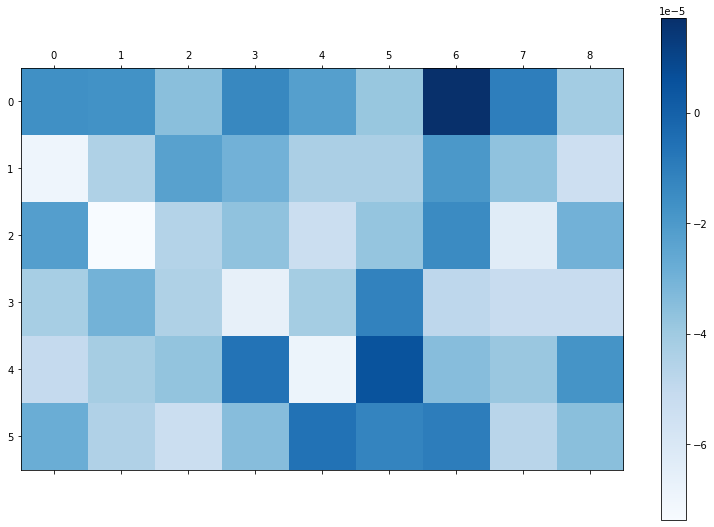

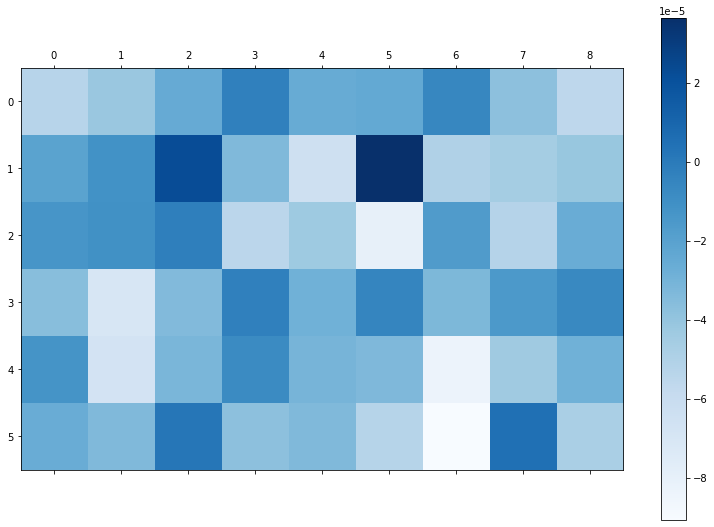

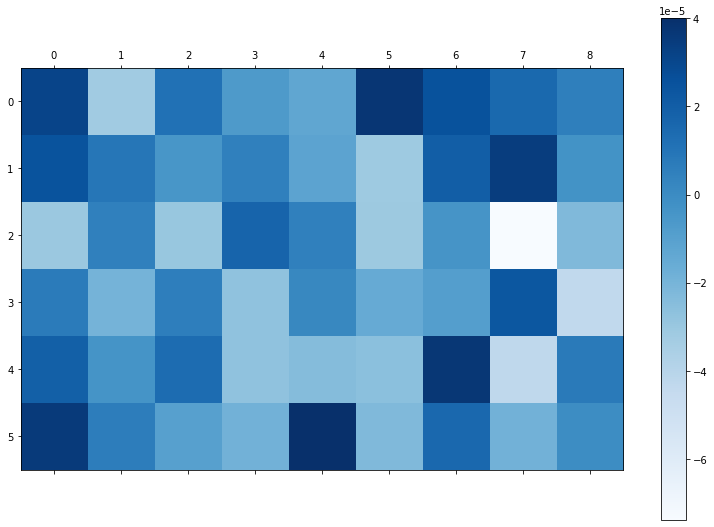

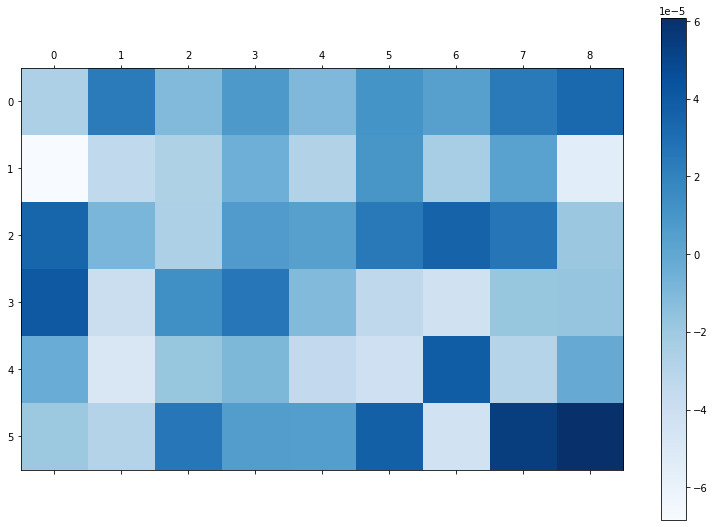

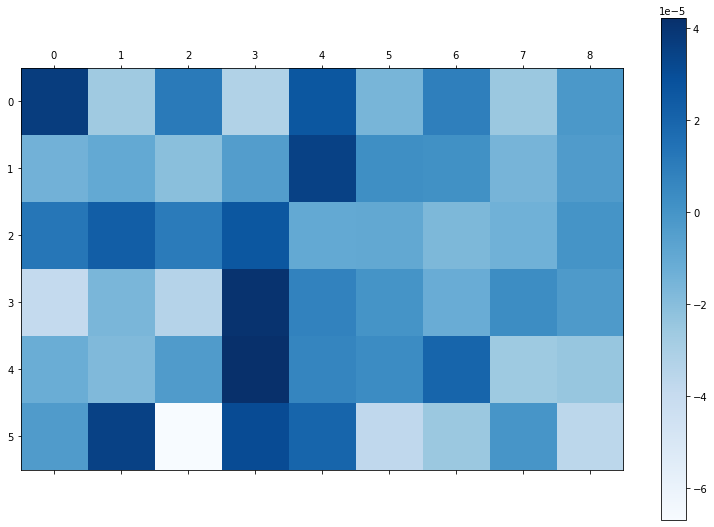

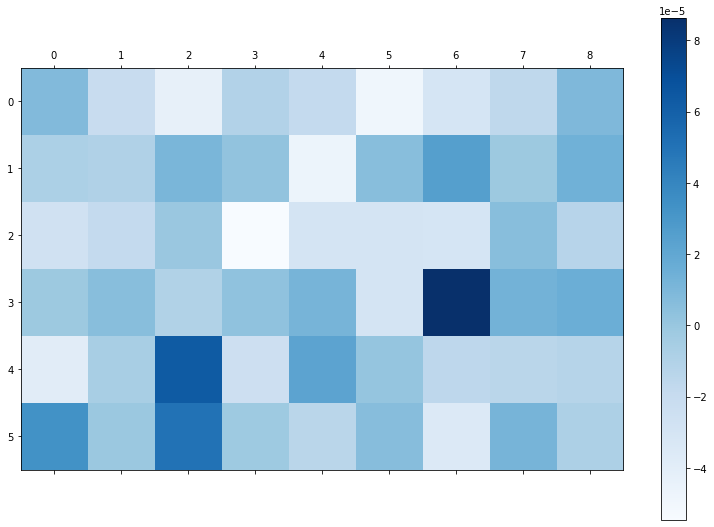

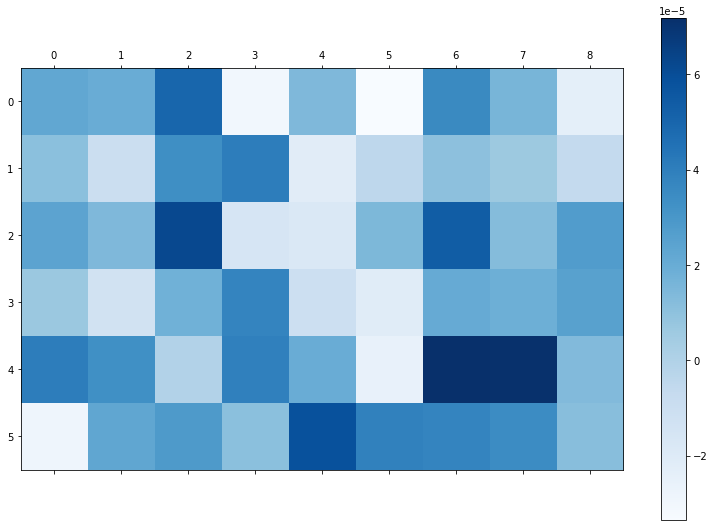

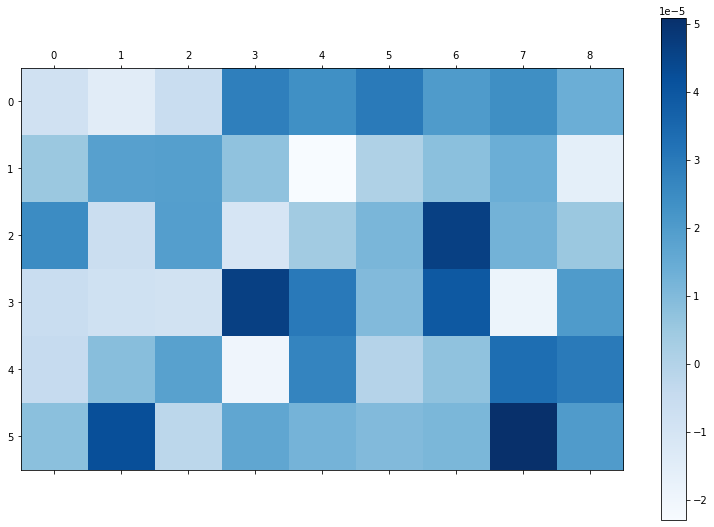

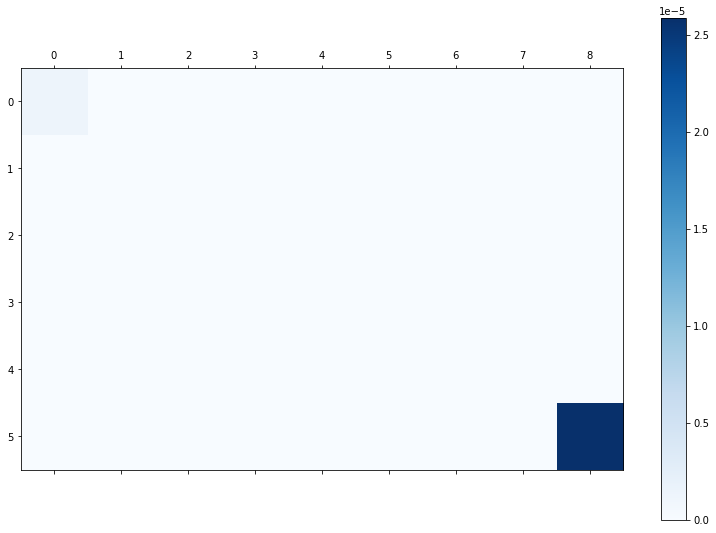

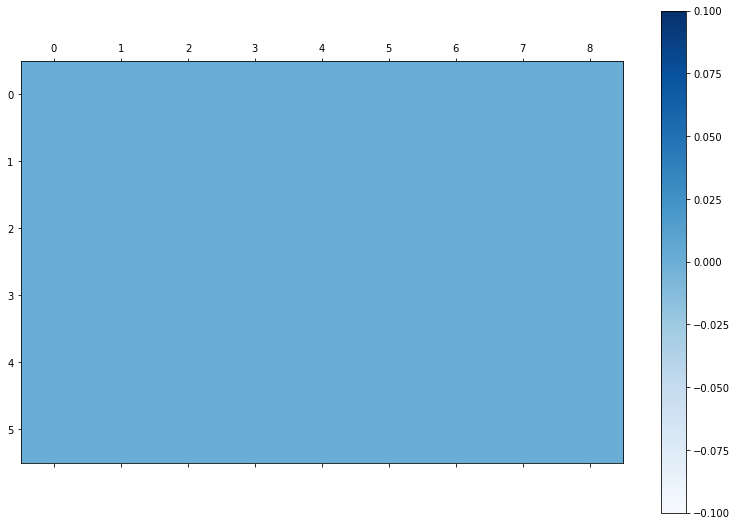

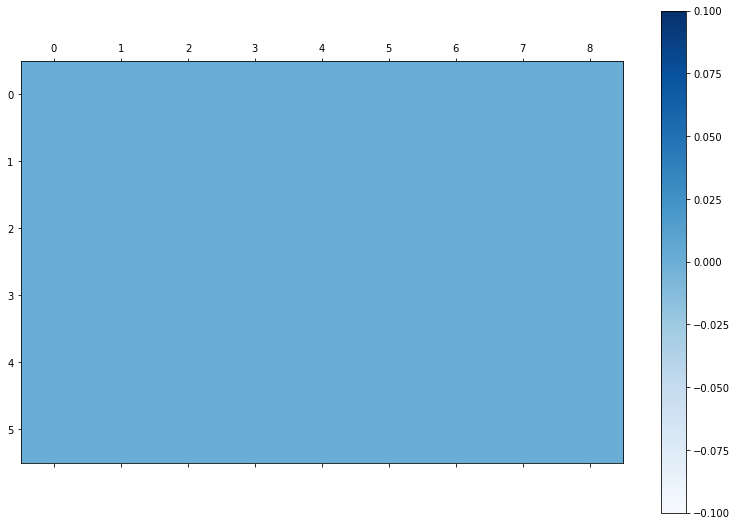

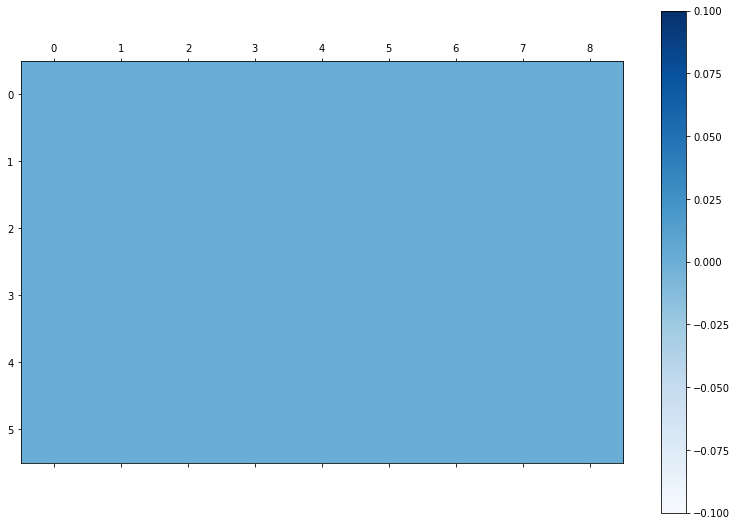

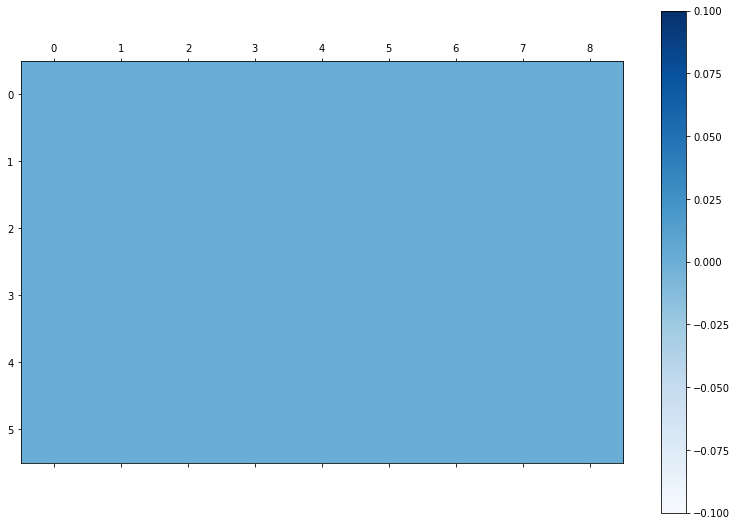

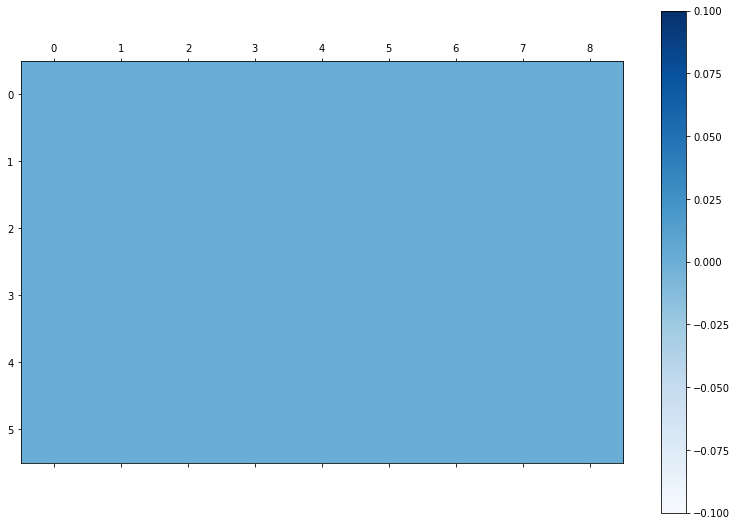

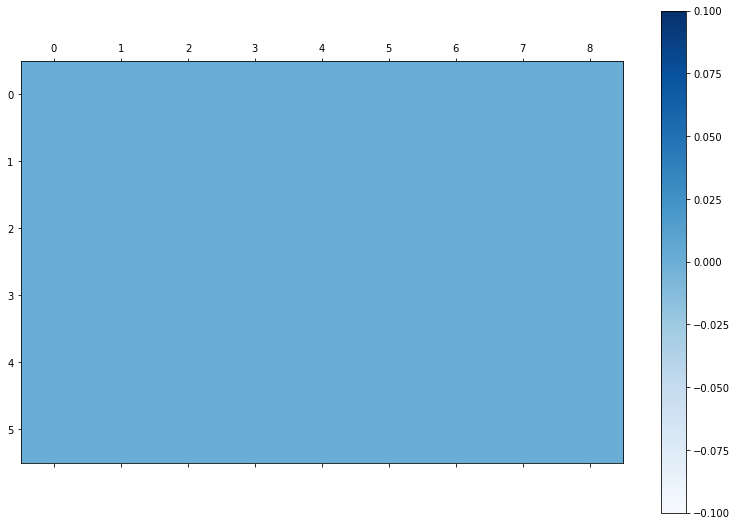

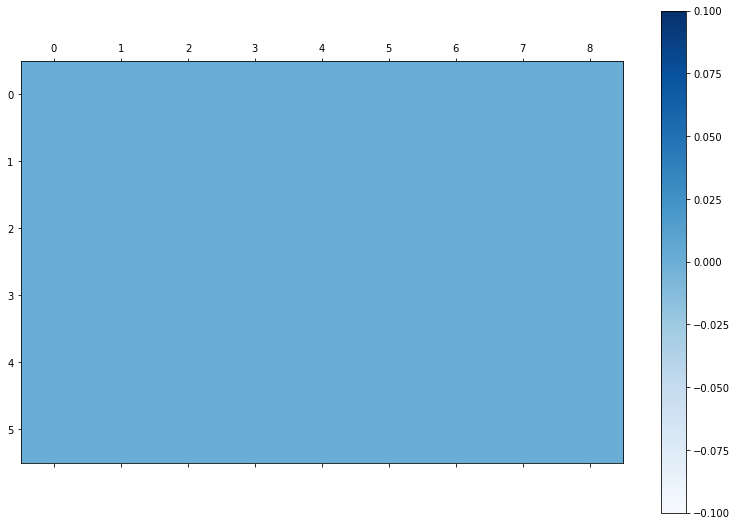

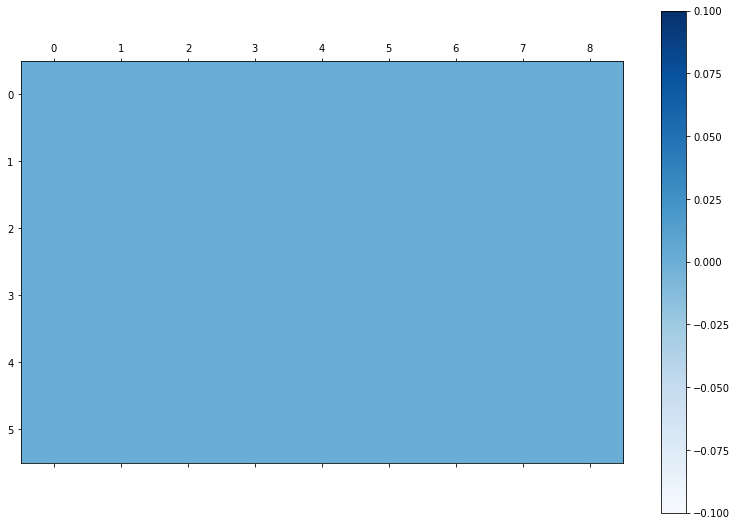

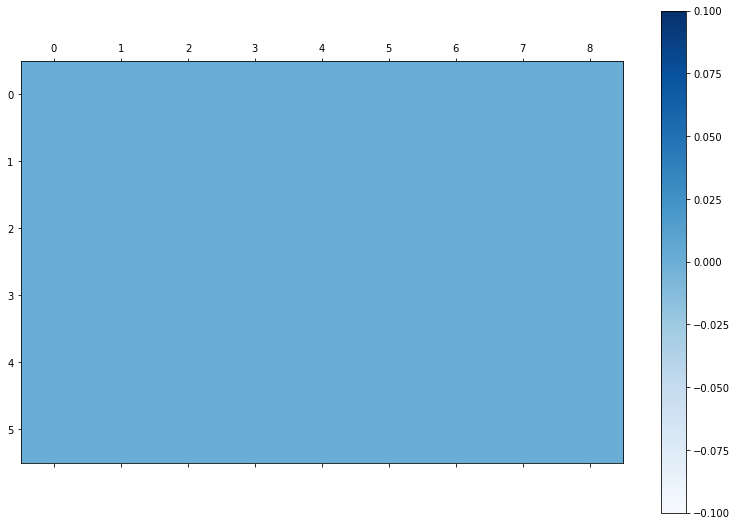

In [51]:
arr = np.zeros((caloCount,6,9))

for calo in range(caloCount):
    arr[calo] = slopes[calo].reshape(6,9)

plt.rcParams["figure.figsize"] = (18,9) 

for calo in range(caloCount):
    plt.matshow(arr[calo], cmap=plt.cm.Blues)
    plt.colorbar()

In [48]:
slopes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [55]:
ax.

AttributeError: 'AxesSubplot' object has no attribute 'display'